<a href="https://colab.research.google.com/github/Muntasir2179/tensorflow-learning/blob/classification-NN-modeling/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems. A classification is where you try to classify something as one thing or another.

A few types of classification problem:
*  Binary Classification.
*  Multiclass Classification.
*  Multilabel Classification.

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# create circles
x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
x.shape

(1000, 2)

In [3]:
x[:10,:]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [4]:
y.shape

(1000,)

In [5]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

## Visualizing the data

In [6]:
import pandas as pd
circles = pd.DataFrame({'X0': x[:, 0], 'X1': x[:, 1], 'label': y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


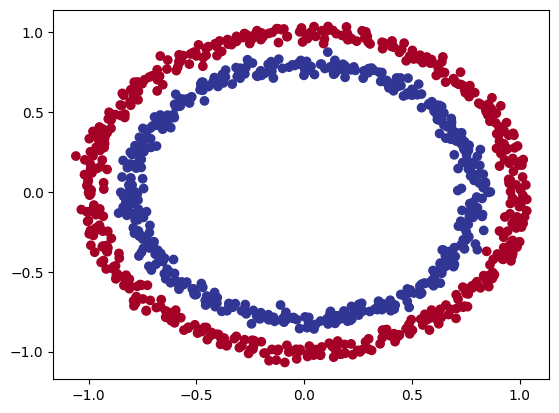

In [7]:
# visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

📖Exercise for understanding the **hyperparameter** tuning
[playground.tensorflow.org](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.55711&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

## Getting data ready

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
x_train.shape, y_train.shape

((800, 2), (800,))

In [10]:
x_test.shape, y_test.shape

((200, 2), (200,))

## Building model to train

In [11]:
import tensorflow as tf

### Testing with model_1

In [12]:
# set the seed
tf.random.set_seed(42)

# creating model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model_1.compile(loss=tf.losses.BinaryCrossentropy(),
              optimizer=tf.optimizers.Adam(learning_rate=0.03),
              metrics=['accuracy'])

# fit the model
model_1.fit(x, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 2.1920 - accuracy: 0.4890
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7022 - accuracy: 0.5220
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.4700
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.4910
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.4770


In [13]:
model_1.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5000


[0.6934487223625183, 0.5]

### Testing with model_2

In [14]:
# set the seed
tf.random.set_seed(42)

# creating model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(loss=tf.losses.BinaryCrossentropy(),
              optimizer=tf.optimizers.Adam(learning_rate=0.03),
              metrics=['accuracy'])

# fit the model
model_2.fit(x, y, epochs=100, verbose=0)

In [15]:
model_2.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5940


[0.693253755569458, 0.593999981880188]

### Testing with model_3

In [16]:
# set the random seed
tf.random.set_seed(42)

# create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model_3.compile(loss=tf.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(learning_rate=0.03),
                metrics=['accuracy'])

# fit the model
model_3.fit(x, y, epochs=100, verbose=0)

In [17]:
model_3.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

**🧮Conclution of testing models:** It looks like our model is not learning enough to make good predictions. No matter what regularization we do it ends up with accuracy of 50%. Which is basically guessing.

So, what should be done further to resolve this issue.....

We need to visualize our data again in another perspective which may give us the notion of whats been wrong in our modeling.

### Visualizing the predictions

In [18]:
model_3.predict(x)[:10]

32/32 [==============================] - 0s 2ms/step


array([[ 82.12955 ],
       [372.33453 ],
       [385.06772 ],
       [333.20322 ],
       [ 76.9552  ],
       [349.00815 ],
       [265.49207 ],
       [ 73.856285],
       [202.35568 ],
       [299.31567 ]], dtype=float32)

In [19]:
# we will be using numpy.meshgrid()
# here is a short example of using meshgrid()
import numpy as np

na, nb = (5, 2)
a = np.linspace(0, 1, na)
b = np.linspace(0, 1, nb)
av, bv = np.meshgrid(a, b)
av, bv

(array([[0.  , 0.25, 0.5 , 0.75, 1.  ],
        [0.  , 0.25, 0.5 , 0.75, 1.  ]]),
 array([[0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.]]))

In [20]:
np.linspace(0, 1, 5), np.linspace(0, 1, 2)

(array([0.  , 0.25, 0.5 , 0.75, 1.  ]), array([0., 1.]))

In [21]:
def plot_decision_boundary(model, x, y):
  '''
  Plots the decision boundary created by a model predicting on x.
  '''
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

  # create x value (we are going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()]  # stack 2D arrays together

  # make predictions
  y_pred = model.predict(x_in)

  # check for multiclass
  if len(y_pred[0]) > 1:
    print('doing multiclass classification')
    # we have to reshape our prediction to get then ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print('binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
binary classification


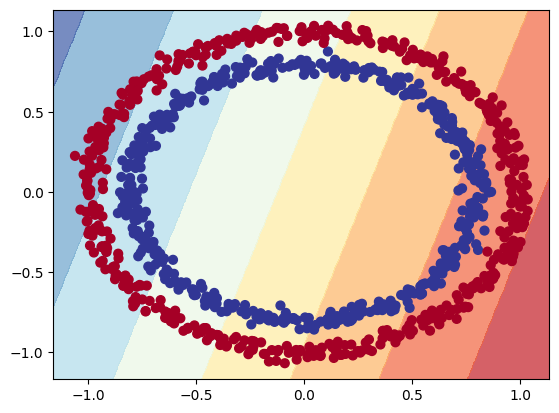

In [22]:
plot_decision_boundary(model=model_3, x=x, y=y)

**🧮Note:** It looks like the model is trying to draw a straight line to classify red and blue dots. But the data is aranged in a circular shape. That's why it not possible to saperate this kind of data with a regression line.

**🔑What is a regression problem?**

📖Regression is a statistical method used in finance, investing, and other disciplines that attempts to determine the strength and character of the relationship between one dependent variable (usually denoted by Y) and a series of other variables (known as independent variables).
[Regression Problem](https://www.investopedia.com/terms/r/regression.asp)

### Checking if our model works on Regeression data

In [23]:
# set the random seed
tf.random.set_seed(42)

# creating some regression data
x_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)   # y = x + 100

# reshaping x_regression to pass into the model
x_regression = tf.reshape(x_regression, shape=(200,1))

# spliting our regression data into training and test sets
x_reg_train = x_regression[:150]
x_reg_test = x_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

**🔑NOTE:** model_3 is designed for Binary Classification. But, now we are dealing with regression problem. So, we need to change the loss function to MAE or MSE.

In [24]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.losses.mae,
              optimizer=tf.optimizers.Adam(),
              metrics=['mae'])

model_4.fit(x_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 226.6966 - mae: 226.6966
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 112.8196 - mae: 112.8196
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 49.7809 - mae: 49.7809
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 75.3300 - mae: 75.3300
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 60.5550 - mae: 60.5550
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 44.9663 - mae: 44.9663
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 46.9949 - mae: 46.9949
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 41.9703 - mae: 41.9703
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 42.2715 - mae: 42.2715
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 42.4679 - mae: 42.4679
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 6ms/step


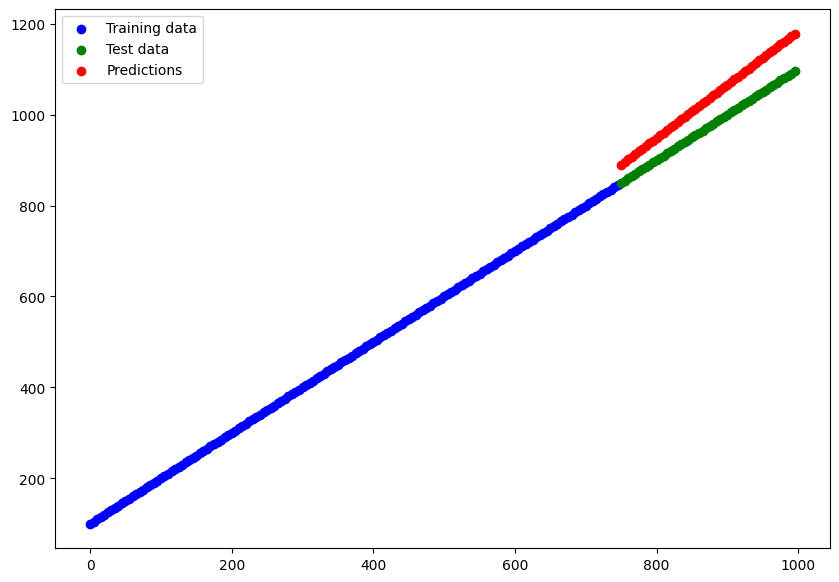

In [25]:
# make prediction with our trained model
y_reg_preds = model_4.predict(x_reg_test)

# plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(x_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(x_reg_test, y_reg_test, c='g', label='Test data')
plt.scatter(x_reg_test, y_reg_preds, c='r', label='Predictions')
plt.legend()

**🧮NOTE:** It looks like our model was trying to classify the classes by drawing a regression line but we have a circular shape of data, which is in a nonlinear shape. So it is not possible to classify this kind of data with regression line.

### Trying to solve non-linearity

In [26]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_5.compile(loss=tf.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(learning_rate=0.03),
                metrics=['accuracy'])

model_5.fit(x, y, epochs=50, callbacks=tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True))

Epoch 1/50
32/32 [==============================] - 2s 5ms/step - loss: 0.6999 - accuracy: 0.4920
Epoch 2/50
32/32 [==============================] - 0s 5ms/step - loss: 0.6953 - accuracy: 0.4840
Epoch 3/50
32/32 [==============================] - 0s 5ms/step - loss: 0.6923 - accuracy: 0.5140
Epoch 4/50
32/32 [==============================] - 0s 4ms/step - loss: 0.6887 - accuracy: 0.5720
Epoch 5/50
32/32 [==============================] - 0s 4ms/step - loss: 0.6898 - accuracy: 0.5190
Epoch 6/50
32/32 [==============================] - 0s 4ms/step - loss: 0.6855 - accuracy: 0.5660
Epoch 7/50
32/32 [==============================] - 0s 4ms/step - loss: 0.6786 - accuracy: 0.5890
Epoch 8/50
32/32 [==============================] - 0s 4ms/step - loss: 0.6481 - accuracy: 0.6370
Epoch 9/50
32/32 [==============================] - 0s 4ms/step - loss: 0.5854 - accuracy: 0.7380
Epoch 10/50
32/32 [==============================] - 0s 4ms/step - loss: 0.5222 - accuracy: 0.7610
Epoch 11/50
32/32 [

In [27]:
test_accuracy = model_5.evaluate(x, y, verbose=0)
print(test_accuracy[1])

0.8159999847412109


313/313 [==============================] - 1s 1ms/step
binary classification


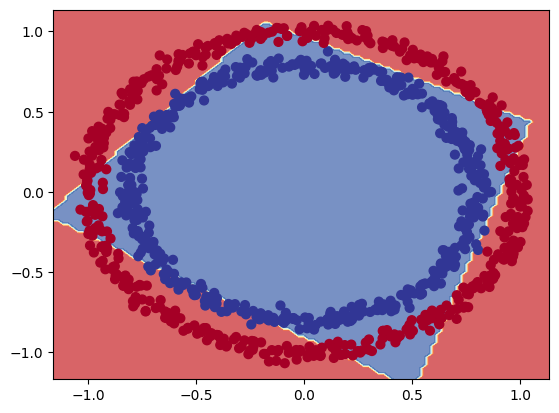

In [28]:
plot_decision_boundary(model=model_5, x=x, y=y)

🤔**Question:** What's wrong with the prediction we've made? Are we really evaluating our model correctly? Hint: What data did the model learn on and what data did we predict on?

🔑**Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

## Linear and non-linear experiments

In [29]:
# create a toy tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

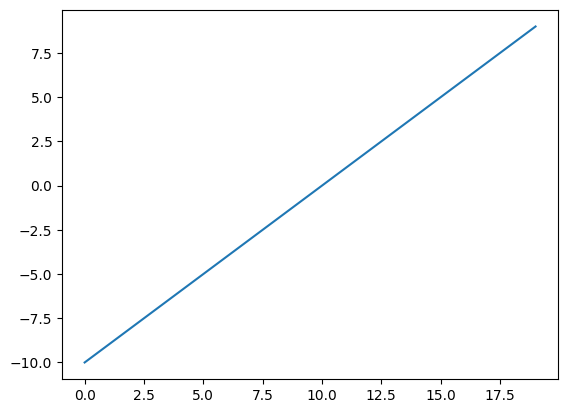

In [30]:
plt.plot(A)

### Applying `sigmoid` activation function on our toy dataset

In [31]:
# let's start by replacing sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

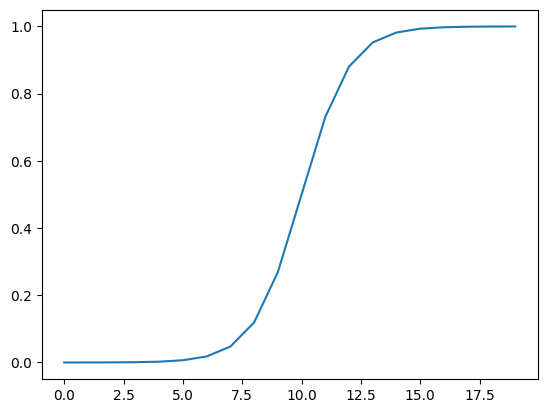

In [32]:
# plot the tensor transformed by our sigmoid() function
plt.plot(sigmoid(A))

**📖NOTE:** It looks like the sigmoid() activation function is transforming a straight line into non-straight line, which can give a model different perspective to learn patterns differently.

🧮**Back to our previous problems:** This was the main issue we were facing when we were dealing with circular shape of data. Our model was trying to classify the points by drawing a straight line. But when we introduced `sigmoid()` activation funciton in the output layer, the model's performance was accelerated by a great number.

### Applying `ReLU` activation function on our toy dataset

In [33]:
# let's recreate relu activation function
def relu(x):
  return tf.maximum(0, x)

In [34]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

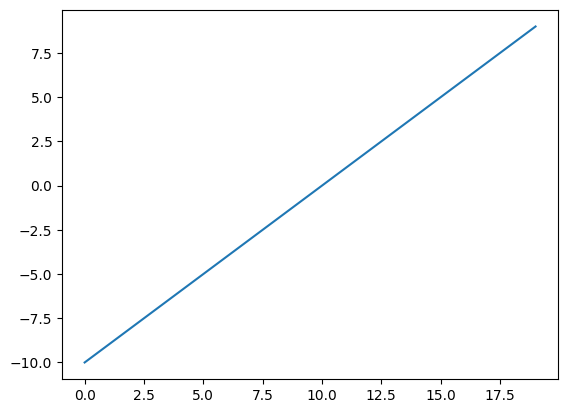

In [35]:
plt.plot(A)

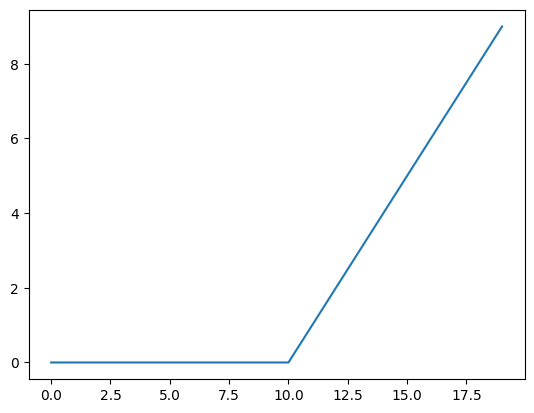

In [36]:
plt.plot(relu(A))

### Applying `Linear` activaiton function on our toy dataset

In [37]:
tf.keras.activations.linear(A), A == tf.keras.activations.linear(A)

(<tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
       dtype=float32)>,
 <tf.Tensor: shape=(20,), dtype=bool, numpy=
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True])>)

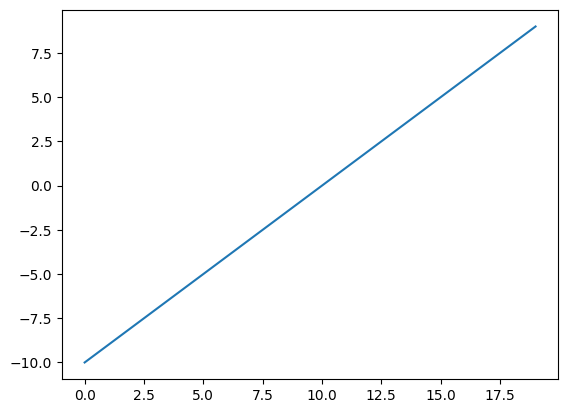

In [38]:
plt.plot(tf.keras.activations.linear(A))

It looks like `linear` activation function does not made any change on our toy dataset.

Here is the article regurding all activation functions we have covered so far.

[Activation Functions](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#)

## Evaluating and improving our classification model

So far we have been training and testing on the same dataset....

Now we will follow the 3 dataset way (train, test and validation)

In [39]:
# split into train and test set
x_train, y_train = x[:800], y[:800]
x_test, y_test = x[800:], y[800:]

# checking the length and shape of train and test set
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [40]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_6.compile(loss=tf.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(learning_rate=0.03),
                metrics=['accuracy'])

callbacks = tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_accuracy', restore_best_weights=True)

history = model_6.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
25/25 [==============================] - 1s 14ms/step - loss: 0.6873 - accuracy: 0.5550 - val_loss: 0.6811 - val_accuracy: 0.5600
Epoch 2/15
25/25 [==============================] - 0s 5ms/step - loss: 0.6671 - accuracy: 0.6125 - val_loss: 0.6435 - val_accuracy: 0.5800
Epoch 3/15
25/25 [==============================] - 0s 4ms/step - loss: 0.5939 - accuracy: 0.7462 - val_loss: 0.5104 - val_accuracy: 0.8950
Epoch 4/15
25/25 [==============================] - 0s 4ms/step - loss: 0.4569 - accuracy: 0.9125 - val_loss: 0.3829 - val_accuracy: 0.9600
Epoch 5/15
25/25 [==============================] - 0s 4ms/step - loss: 0.2955 - accuracy: 0.9663 - val_loss: 0.2213 - val_accuracy: 0.9900
Epoch 6/15
25/25 [==============================] - 0s 4ms/step - loss: 0.1905 - accuracy: 0.9737 - val_loss: 0.1340 - val_accuracy: 0.9850
Epoch 7/15
25/25 [==============================] - 0s 6ms/step - loss: 0.1259 - accuracy: 0.9875 - val_loss: 0.1021 - val_accuracy: 0.9900
Epoch 8/15
25/25 [=

In [41]:
# evaluating our models performance
eval_data = model_6.evaluate(x_test, y_test)

# printing the test accuracy
print(eval_data[1])

7/7 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9950
0.9950000047683716


313/313 [==============================] - 1s 1ms/step
binary classification
313/313 [==============================] - 0s 2ms/step
binary classification


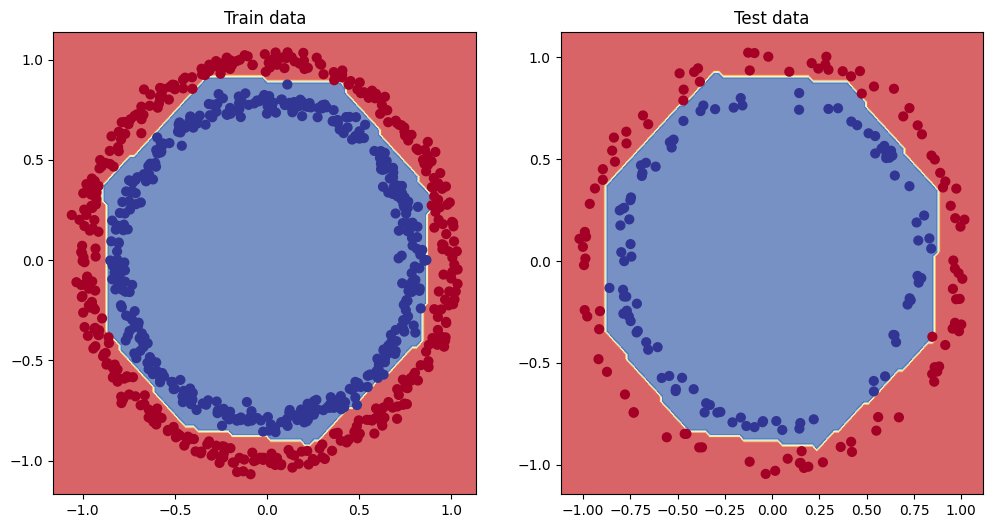

In [42]:
# ploting the dicision boundary for the training and test dataset
plt.figure(figsize=(12,6))

# ploting training set
plt.subplot(1, 2, 1)
plt.title('Train data')
plot_decision_boundary(model_6, x=x_train, y=y_train)

# ploting test set
plt.subplot(1, 2, 2)
plt.title('Test data')
plot_decision_boundary(model_6, x=x_test, y=y_test)
plt.show()

### Ploting history data

In [43]:
train_test_history = pd.DataFrame(history.history)
train_test_history.head()

,loss,accuracy,val_loss,val_accuracy
0,0.687258,0.55500,0.681098,0.560
1,0.667065,0.61250,0.643535,0.580
2,0.593885,0.74625,0.510440,0.895
3,0.456932,0.91250,0.382882,0.960
4,0.295455,0.96625,0.221350,0.990


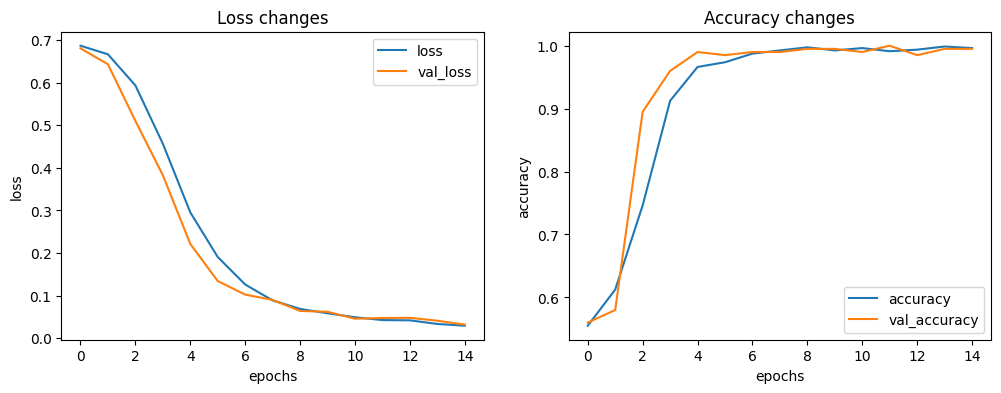

In [44]:
plt.figure(figsize=(12, 4))

# loss curve
plt.subplot(1, 2, 1)
train_test_history['loss'].plot()
train_test_history['val_loss'].plot()
plt.title('Loss changes')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

# accuracy curve
plt.subplot(1, 2, 2)
train_test_history['accuracy'].plot()
train_test_history['val_accuracy'].plot()
plt.title('Accuracy changes')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:

* A learning rate **callback** - Extra pice of functionality that we can add during training.
* Another model.
* A modified loss curves plot.

In [45]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# creating a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model_7.fit(x_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.7153 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7145 - accuracy: 0.5013 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7137 - accuracy: 0.5013 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7129 - accuracy: 0.4950 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7120 - accuracy: 0.4950 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7111 - accuracy: 0.4762 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7101 - accuracy: 0.4638 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7092 - accuracy: 0.4250 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss:

<Axes: xlabel='Learning Rate'>

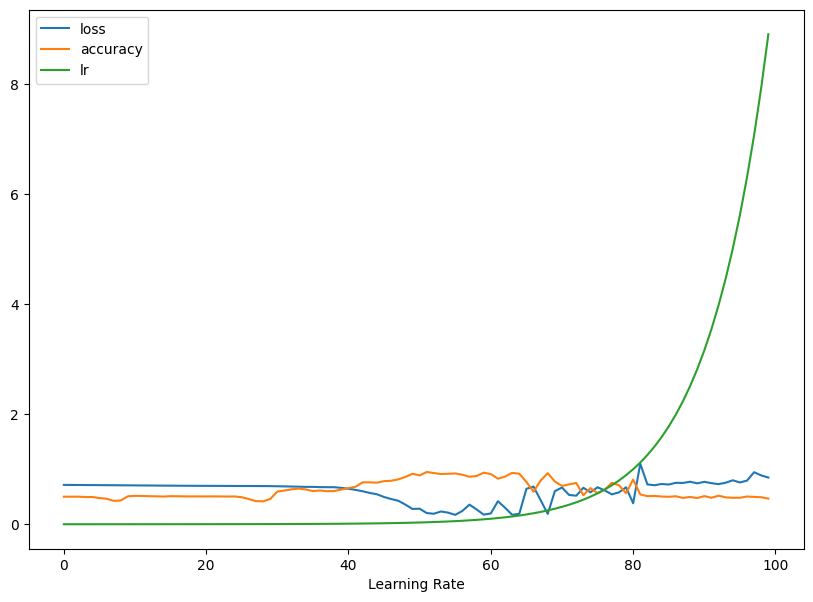

In [46]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel='Learning Rate')

Text(0.5, 1.0, 'Learning rate vs. Loss')

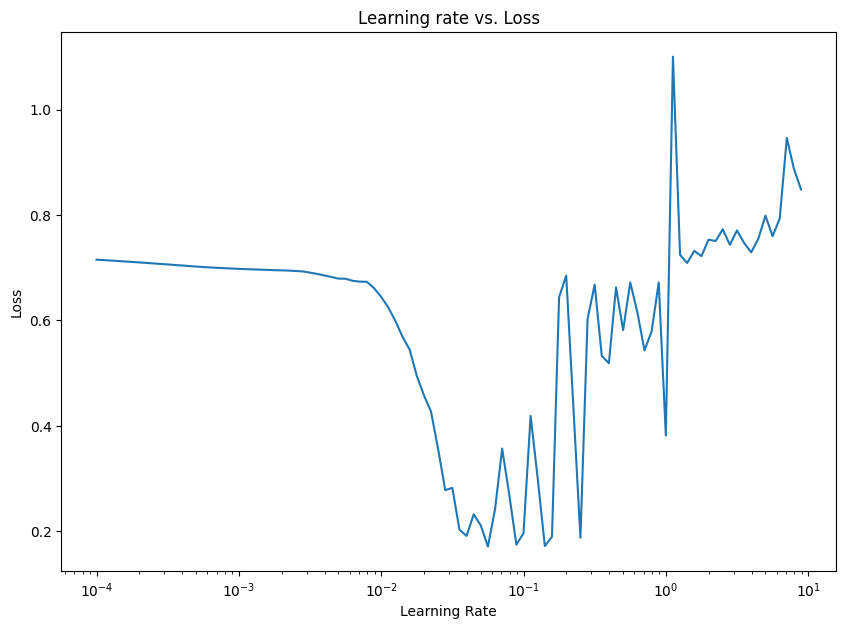

In [47]:
# plot the learning rate versus the loss
lrs = 1e-4 * (10**(tf.range(100)/20))   # assuming different learning rates to experiment with
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning rate vs. Loss')

**🧮NOTE:** It looks like the `best learning_rate` is within the range of `10^-2 to 10^-1`. Because, loss is decreasing in a significat rate within this range. So, in order to find the best learning rate we can consider any values within this range.

### Training same model with ideal learning rate

In [48]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_8.compile(loss='binary_crossentropy',
                optimizer=tf.optimizers.Adam(learning_rate=0.055),
                metrics=['accuracy'])

history = model_8.fit(x_train,
            y_train,
            validation_data=(x_test, y_test),
            epochs=15, callbacks=tf.keras.callbacks.EarlyStopping(patience=7,
                                                                  monitor='val_accuracy',
                                                                  restore_best_weights=True))

Epoch 1/15
25/25 [==============================] - 2s 20ms/step - loss: 0.6909 - accuracy: 0.5125 - val_loss: 0.6791 - val_accuracy: 0.5450
Epoch 2/15
25/25 [==============================] - 0s 6ms/step - loss: 0.6812 - accuracy: 0.5163 - val_loss: 0.6759 - val_accuracy: 0.4850
Epoch 3/15
25/25 [==============================] - 0s 6ms/step - loss: 0.6518 - accuracy: 0.6212 - val_loss: 0.6077 - val_accuracy: 0.7700
Epoch 4/15
25/25 [==============================] - 0s 6ms/step - loss: 0.5739 - accuracy: 0.7300 - val_loss: 0.4701 - val_accuracy: 0.8600
Epoch 5/15
25/25 [==============================] - 0s 6ms/step - loss: 0.3273 - accuracy: 0.8975 - val_loss: 0.2975 - val_accuracy: 0.8750
Epoch 6/15
25/25 [==============================] - 0s 6ms/step - loss: 0.1585 - accuracy: 0.9625 - val_loss: 0.1238 - val_accuracy: 0.9700
Epoch 7/15
25/25 [==============================] - 0s 6ms/step - loss: 0.1229 - accuracy: 0.9663 - val_loss: 0.0819 - val_accuracy: 0.9850
Epoch 8/15
25/25 [=

In [49]:
# evaluating our model
model_8.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9850


[0.029575753957033157, 0.9850000143051147]

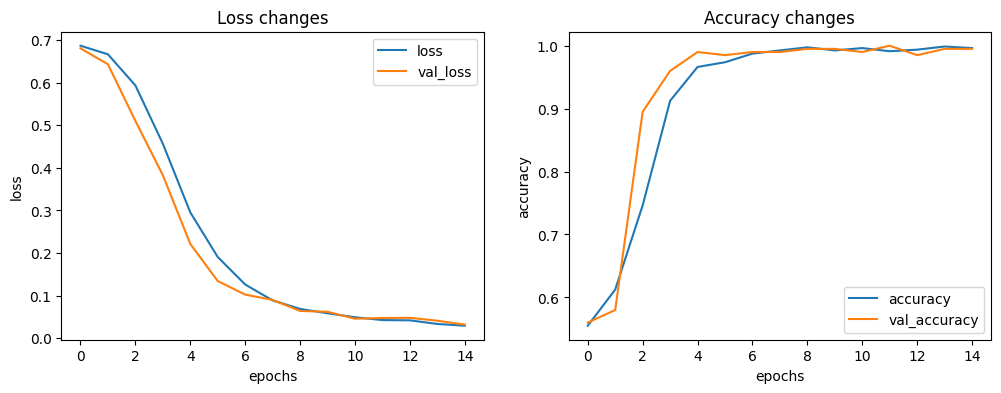

In [50]:
# ploting the history of training
plt.figure(figsize=(12, 4))

# loss curve
plt.subplot(1, 2, 1)
train_test_history['loss'].plot()
train_test_history['val_loss'].plot()
plt.title('Loss changes')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

# accuracy curve
plt.subplot(1, 2, 2)
train_test_history['accuracy'].plot()
train_test_history['val_accuracy'].plot()
plt.title('Accuracy changes')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

313/313 [==============================] - 1s 2ms/step
binary classification
313/313 [==============================] - 0s 1ms/step
binary classification


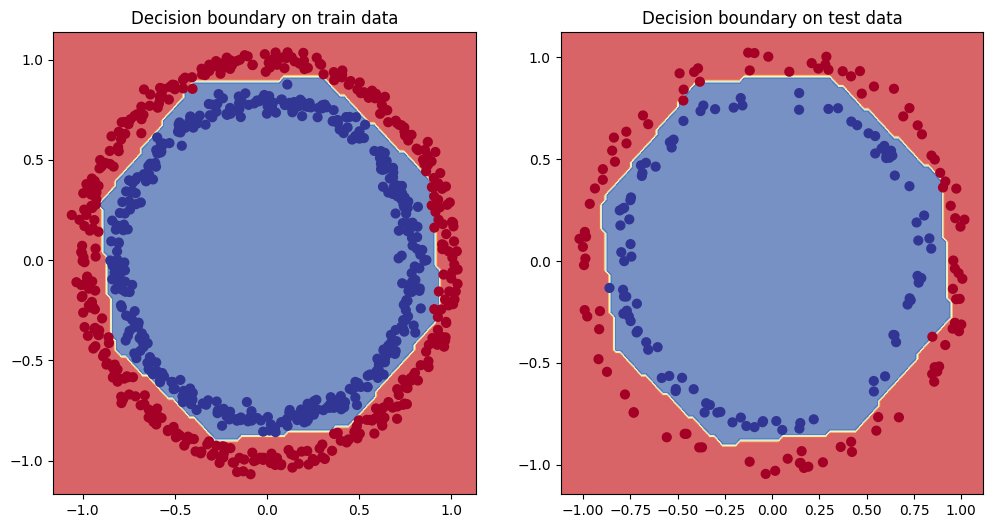

In [51]:
# ploting the dicision boundary for the training and test dataset for model_8
plt.figure(figsize=(12,6))

# ploting training set
plt.subplot(1, 2, 1)
plt.title('Decision boundary on train data')
plot_decision_boundary(model_8, x=x_train, y=y_train)

# ploting test set
plt.subplot(1, 2, 2)
plt.title('Decision boundary on test data')
plot_decision_boundary(model_8, x=x_test, y=y_test)
plt.show()

## More classification evaluation methods

* Accuracy.
* Precision.
* Recall.
* F1-score.
* Confusion matrix.
* classification report.

In [52]:
# check the accuracy of our model
loss, accuracy = model_8.evaluate(x_test, y_test)
print(f'Model loss on the test set: {loss}')
print(f'Model accuracy on the test set: {accuracy}')

7/7 [==============================] - 0s 5ms/step - loss: 0.0296 - accuracy: 0.9850
Model loss on the test set: 0.029575753957033157
Model accuracy on the test set: 0.9850000143051147


### Ploting confusion matrix

In [57]:
# makeing predictions
y_preds = model_8.predict(x_test)

7/7 [==============================] - 0s 3ms/step


In [58]:
y_preds[:10]

array([[9.9811697e-01],
       [9.9993896e-01],
       [9.9761289e-01],
       [9.9878103e-01],
       [5.3534549e-02],
       [3.5316776e-04],
       [9.5739239e-01],
       [2.0125782e-02],
       [9.9999690e-01],
       [2.0890830e-01]], dtype=float32)

**🧮NOTE:** It looks like the prediction output is in the `probability form`. The standard output from the `sigmoid or softmax` activation function.

In [71]:
# confusion metrics
from sklearn.metrics import confusion_matrix

# getting predictions into 0/1 form
y_preds = tf.cast(tf.reshape(tf.round(y_preds), shape=(200,)), dtype=tf.int64).numpy()

# create confusion matrix
confusion_matrix(y_test, y_preds)

array([[98,  3],
       [ 0, 99]])

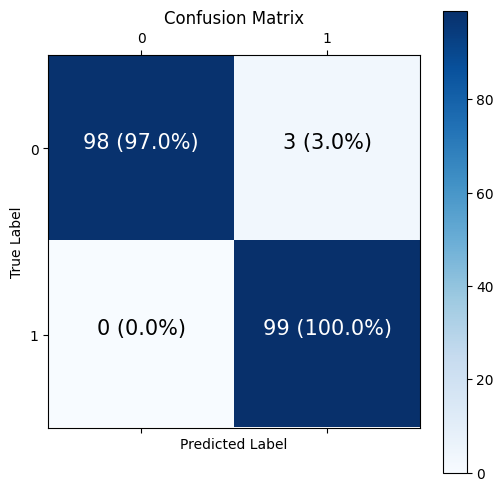

In [77]:
import itertools

figsize = (6, 6)

# create the confusion metrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]   # normalize our confusion matrix
n_classes = cm.shape[0]

# let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# label the axes
ax.set(title='Confusion Matrix',
       xlabel='Predicted Label',
       ylabel='True Label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# set threshhold for different colors
threshold = (cm.max() + cm.min()) / 2.0

# plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)',
           horizontalalignment='center',
           color='white' if cm[i, j] > threshold else 'black',
           size=15)